# Comparando histogramas de amostras

## importando bibliotecas

In [3]:
import pandas as pd
import seaborn as sns

AMOSTRAS_POR_CLASSE = 3

PATHS = {'sem_otsu':'./csvs/lbp_toras.csv',
         'com_otsu':'./csvs/otsu_lbp_toras.csv'}

TARGET_NAMES = {'broca': 0, 'fissura': 1,
                'musgo': 2, 'quebra': 3}

sns.set_style('darkgrid')

         57      58      file
0     754.0  1326.0  sem_otsu
1    1722.0  3058.0  sem_otsu
2    1525.0  2727.0  sem_otsu
3    1550.0  2068.0  sem_otsu
4    1152.0  2044.0  sem_otsu
5    1243.0  2181.0  sem_otsu
6    2333.0  4153.0  sem_otsu
7    2274.0  4149.0  sem_otsu
8    2203.0  3907.0  sem_otsu
9    3230.0  5754.0  sem_otsu
10    668.0  1272.0  sem_otsu
11   3064.0  5423.0  sem_otsu
12  10288.0   142.0  com_otsu
13  22231.0   592.0  com_otsu
14  23407.0   148.0  com_otsu
15  19377.0    47.0  com_otsu
16  14192.0   317.0  com_otsu
17  17066.0   190.0  com_otsu
18  27383.0   834.0  com_otsu
19  29369.0   676.0  com_otsu
20  23188.0  1132.0  com_otsu
21  41010.0  1526.0  com_otsu
22   9719.0   132.0  com_otsu
23  44767.0   729.0  com_otsu


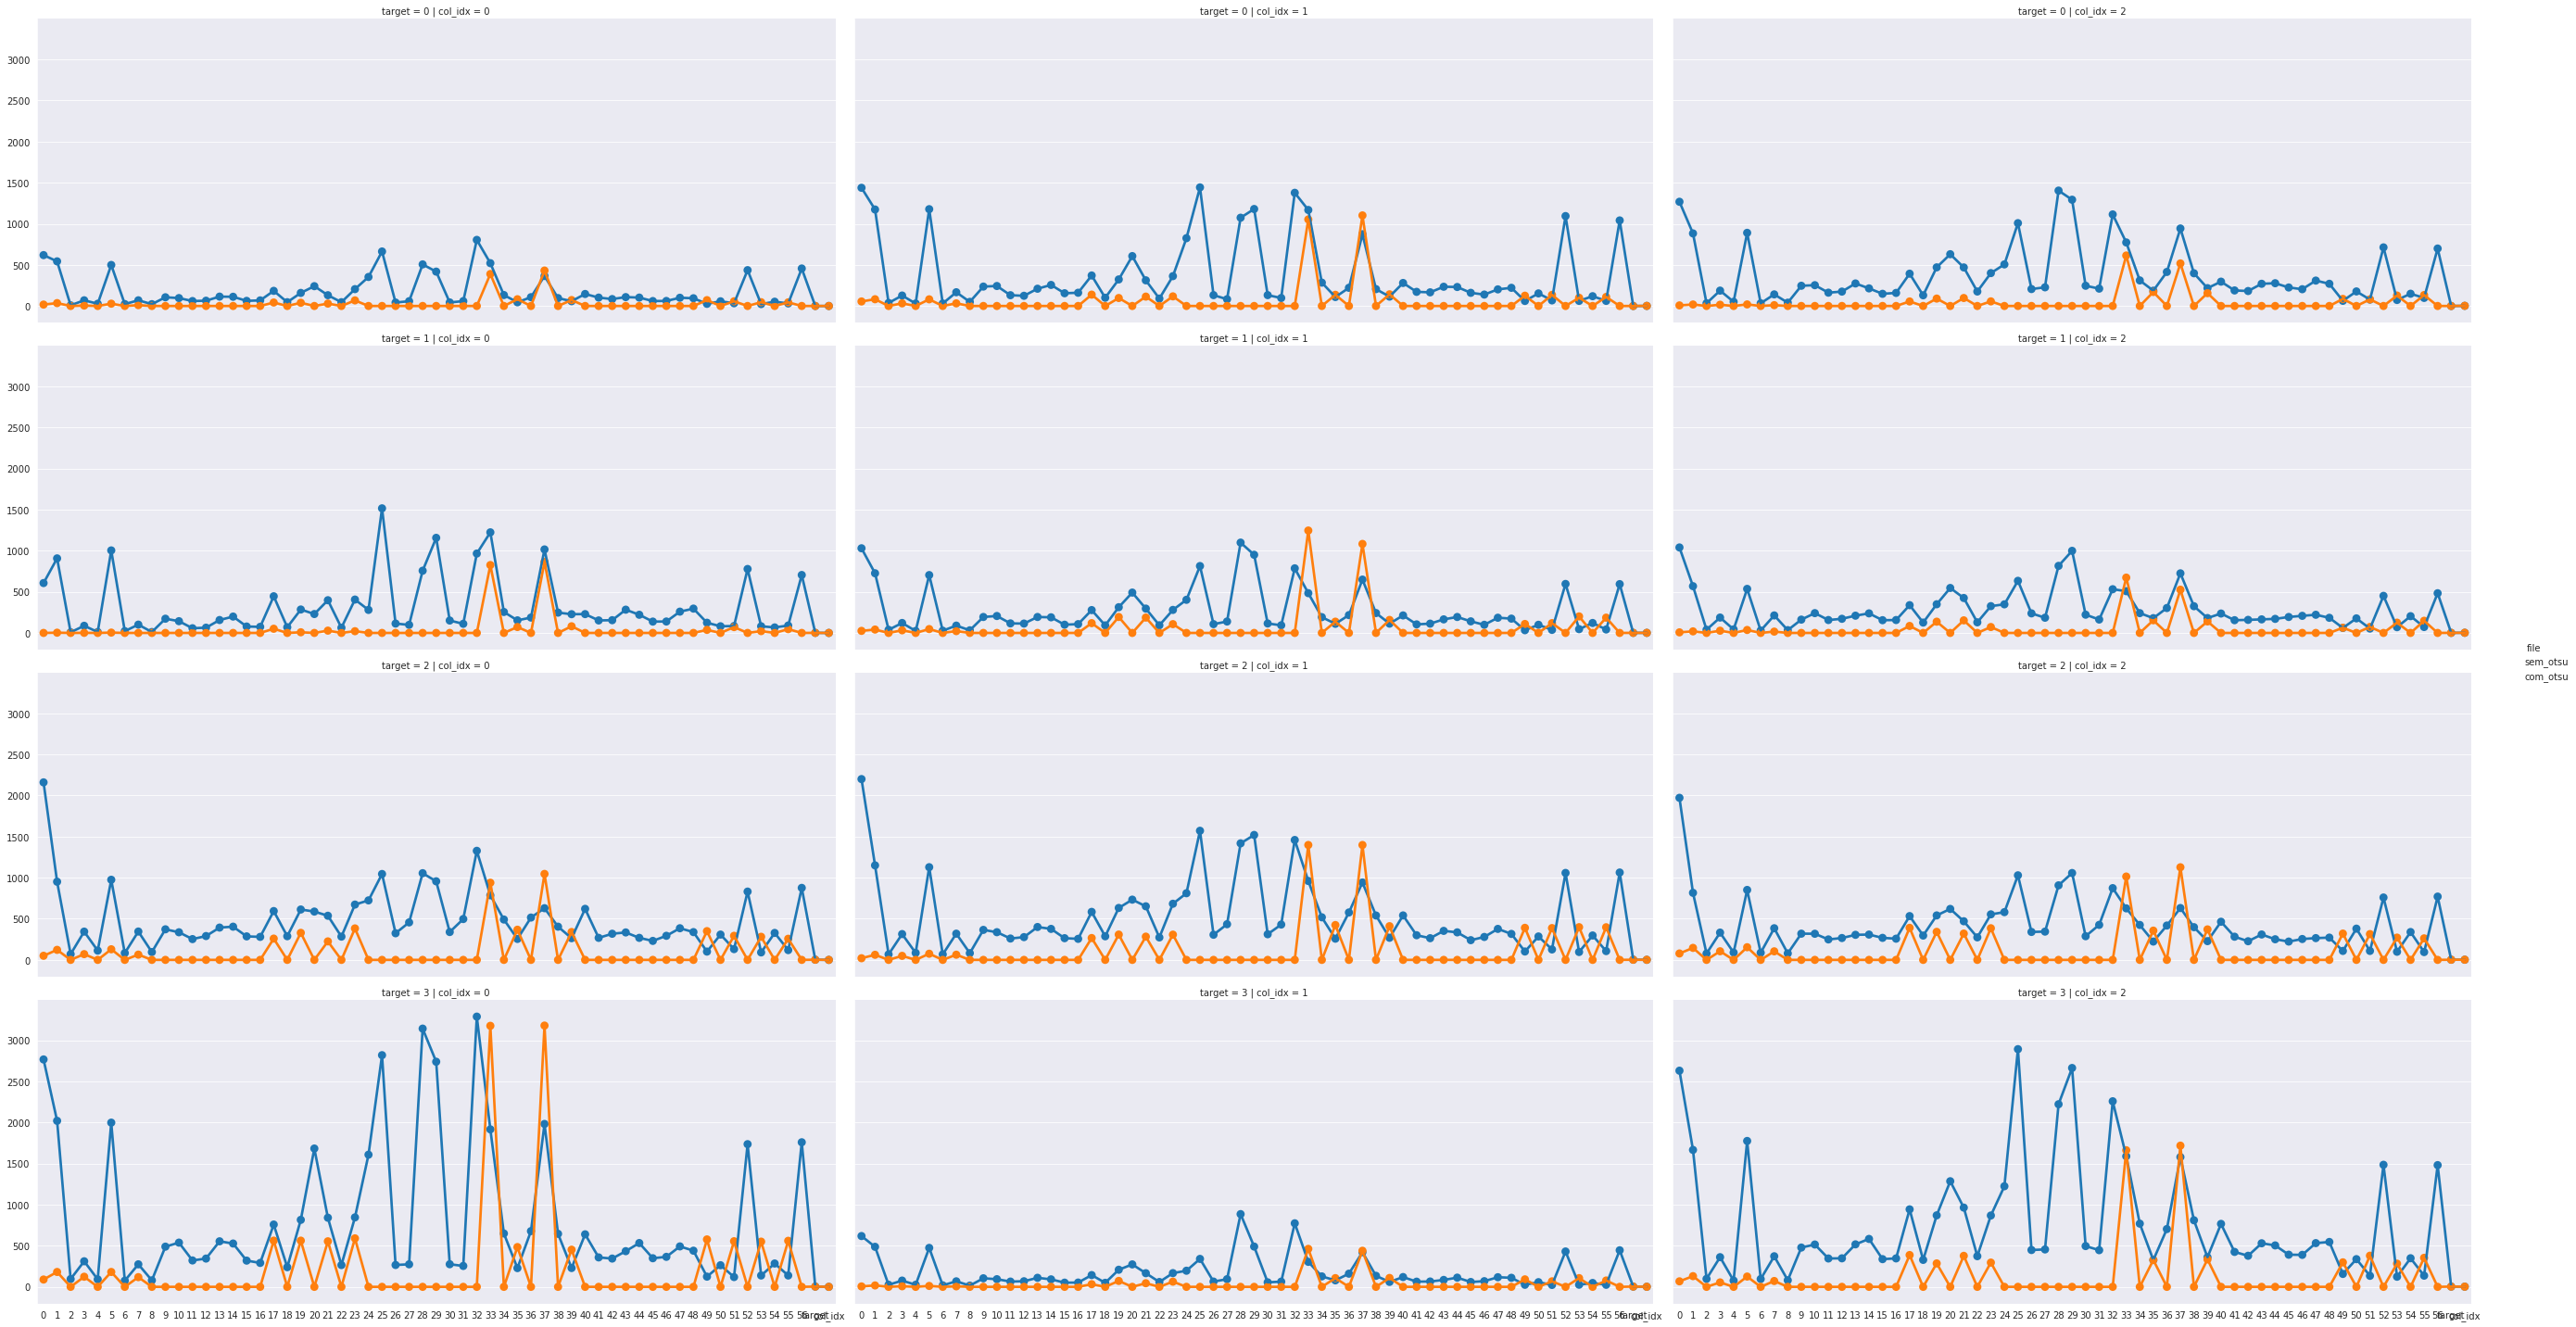

In [4]:
df_list = []
for path in PATHS:
  for target, df in pd.read_csv(PATHS[path], index_col=0).groupby('target'):
    temp_df = df.head(AMOSTRAS_POR_CLASSE).copy()
    temp_df['file'] = path
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

df['col_idx'] = [i % AMOSTRAS_POR_CLASSE for i in range(len(df))]

df_out = pd.concat(
  [df.pop('57'), df.pop('58')],
  ignore_index=True,
  axis='columns')

df_out.columns = ['57', '58']
df_out['file'] = df['file']
print(df_out)

g = sns.FacetGrid(
  data=df,
  col='col_idx',
  row='target',
  hue='file',
  height=5,
  aspect=2.5
)

g.map_dataframe(sns.pointplot)
g.add_legend()

None